In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
image_size = [224,224]
data_path = 'augmented_brain_tumor_dataset'

In [3]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 15s 0us/step


In [4]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [5]:
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [6]:
preds = Dense(2,activation='softmax')(x)

In [7]:
model = Model(inputs = vgg.input,outputs=preds)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in vgg.layers:
    layer.trainable = False

In [10]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('augmented_brain_tumor_dataset', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator=train_datagen.flow_from_directory('brain_tumor_dataset', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 25484 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

25484
32
7


In [13]:
step_size_train=train_generator.n//train_generator.batch_size
r = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train, 
                        validation_data = validation_generator,
                   epochs=5)

/Users/egemenakbal/opt/miniconda3/envs/tfp-gpu/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
796/796 [==============================] - 3120s 4s/step - loss: 0.3616 - accuracy: 0.9187 - val_loss: 0.0411 - val_accuracy: 0.9847
Epoch 2/5
796/796 [==============================] - 3176s 4s/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0503 - val_accuracy: 0.9877
Epoch 3/5
796/796 [==============================] - 2888s 4s/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0226 - val_accuracy: 0.9930
Epoch 4/5
796/796 [==============================] - 2775s 3s/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0076 - val_accuracy: 0.9977
Epoch 5/5
796/796 [==============================] - 3103s 4s/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0188 - val_accuracy: 0.9940


In [14]:
from tensorflow.keras.models import load_model

In [15]:
model.save('brain_tumor_vgg16.h5')

In [16]:
model1 = load_model('brain_tumor_vgg16.h5')

In [18]:
img_path = 'brain_tumor_dataset/yes/y52.jpg'

In [19]:
img = image.load_img(img_path,target_size=(224,224))
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [26]:
rslt = model1.predict(img_data)

/Users/egemenakbal/opt/miniconda3/envs/tfp-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


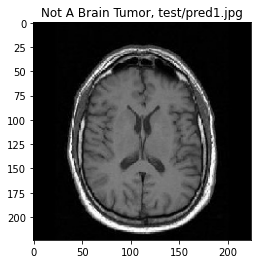

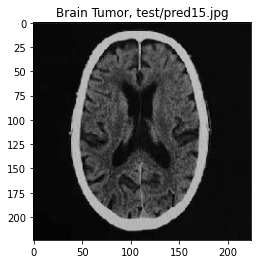

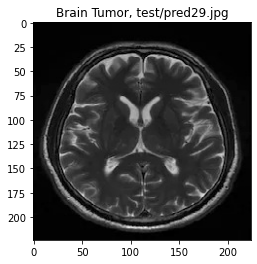

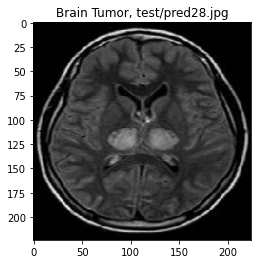

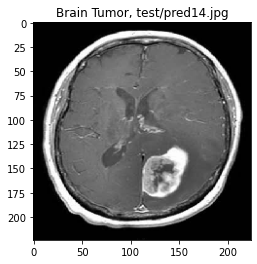

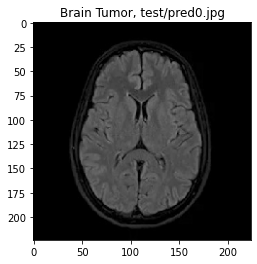

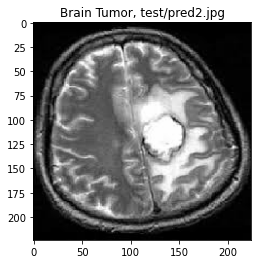

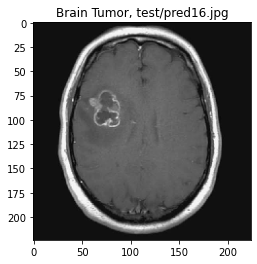

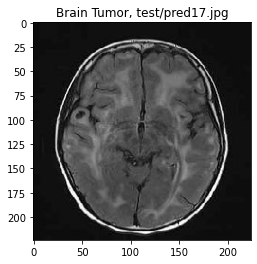

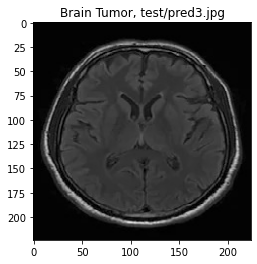

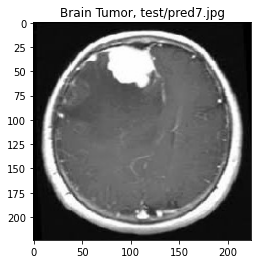

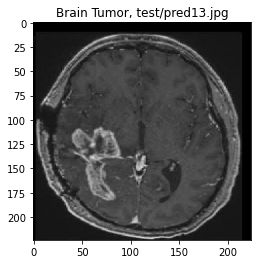

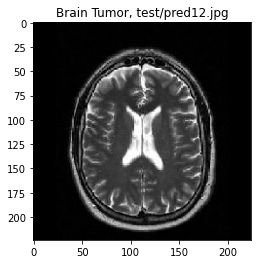

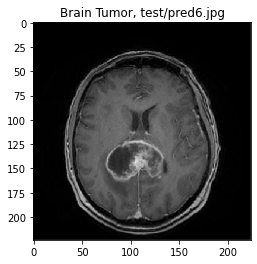

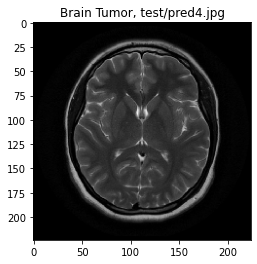

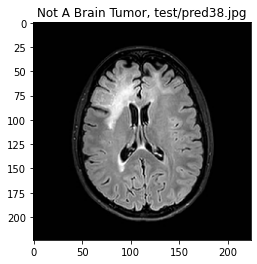

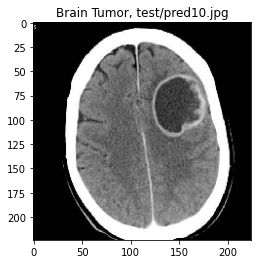

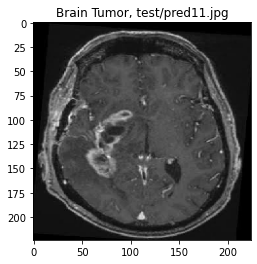

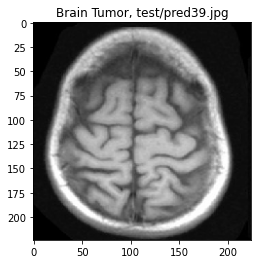

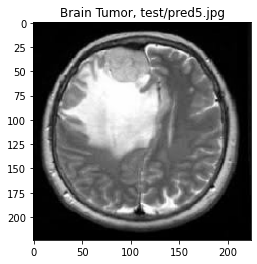

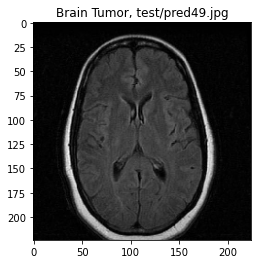

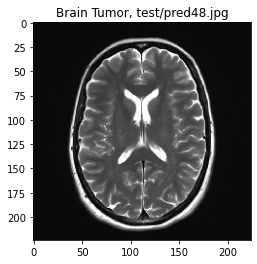

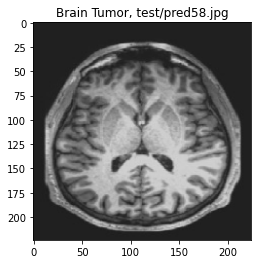

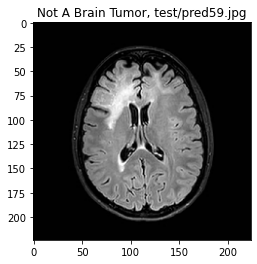

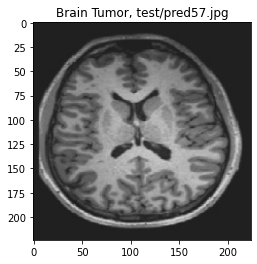

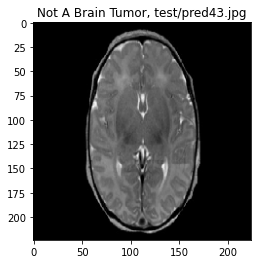

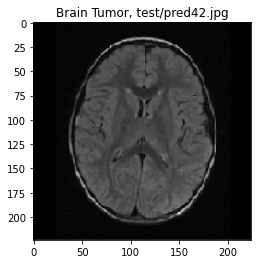

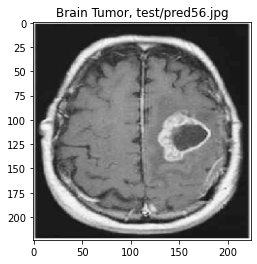

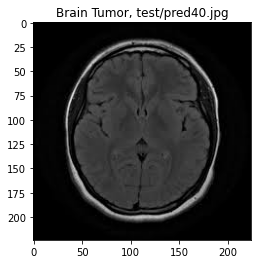

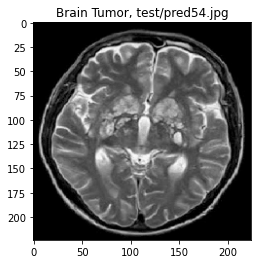

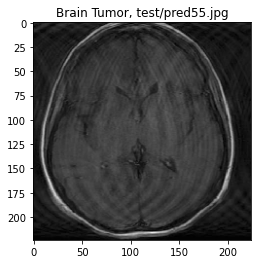

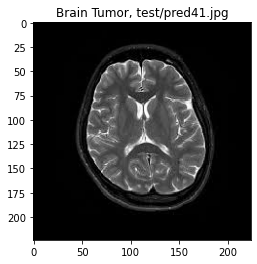

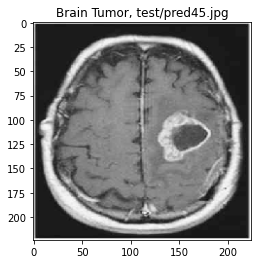

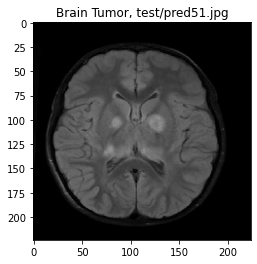

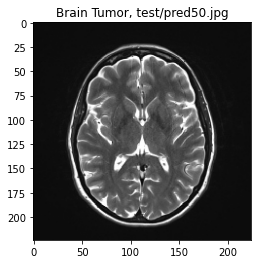

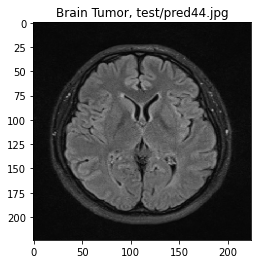

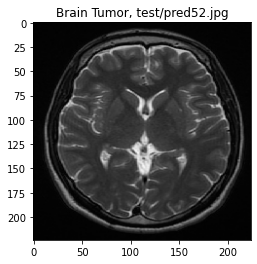

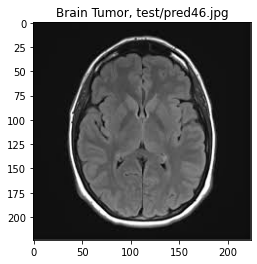

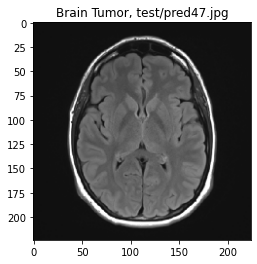

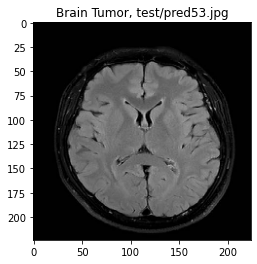

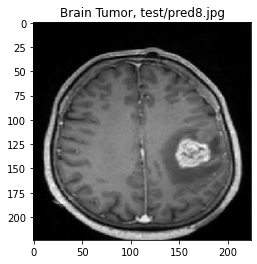

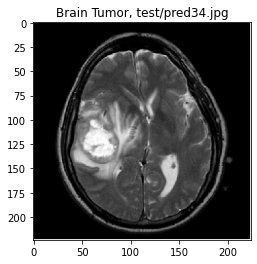

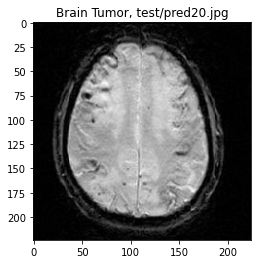

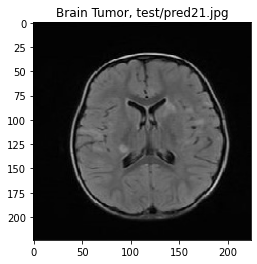

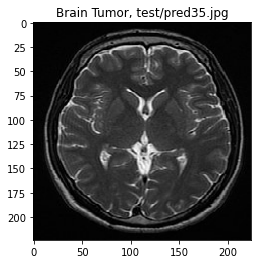

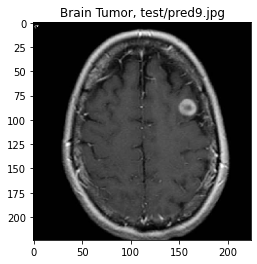

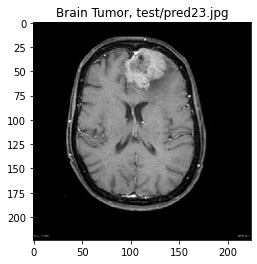

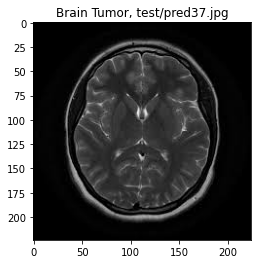

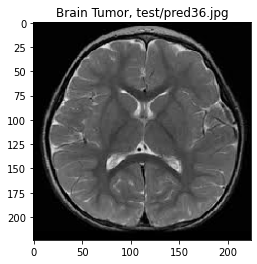

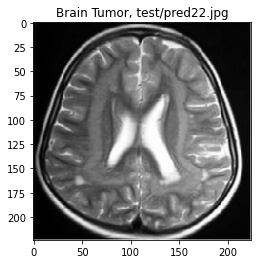

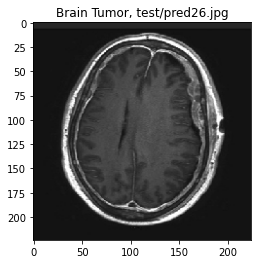

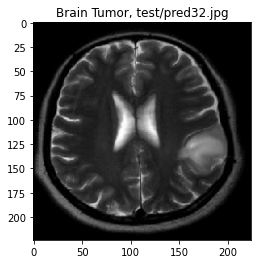

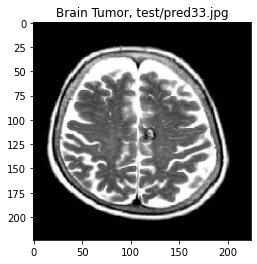

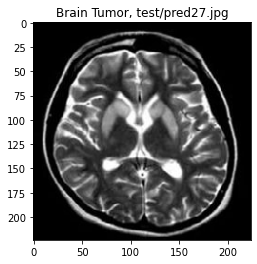

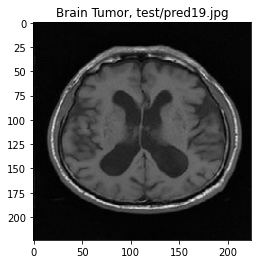

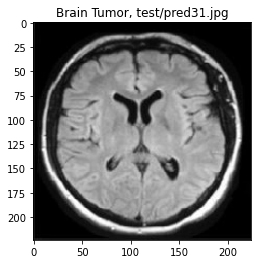

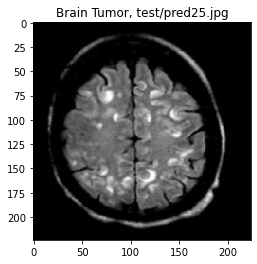

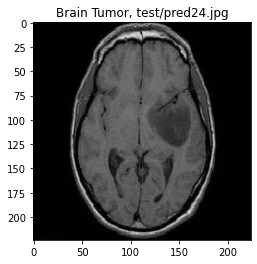

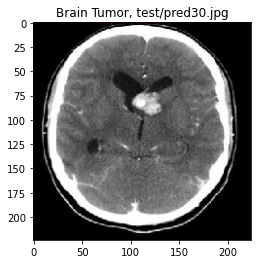

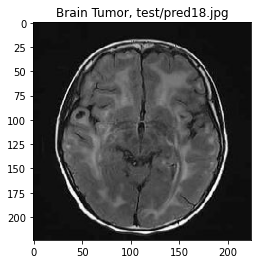

In [28]:
img_path = 'test/'
for x in os.listdir(img_path): 
    path = os.path.join(img_path,x)
    img = image.load_img(path,target_size=(224,224))
    y = image.img_to_array(img)
    y = np.expand_dims(y,axis=0)
    img_data = preprocess_input(y)
    rslt = model1.predict(img_data)
    #print(path)
    
    if rslt[0][0] == 1:
        prediction = 'Not A Brain Tumor,' + " " + path
    else:
        prediction = 'Brain Tumor,' + " " + path
        
    plt.figure()
    plt.title(prediction)
    plt.imshow(img)
    #print("--------------")